In [1]:
import pykrige
import numpy as np
from geopandas.tools import sjoin

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
from shapely.geometry import Point

In [3]:
# Step 1: Read the shapefile
shapefile_path = r'G:\fresh_start\paper\code_paper\arcgis\koshibasin\physiographic_koshi\koshi_5_physiographic.shp'
gdf_basin = gpd.read_file(shapefile_path)



In [23]:
unique_descriptions = gdf_basin['DESCRIPTIO'].unique()

# Print the unique descriptions
print(unique_descriptions)

['Middle Mountain' 'Hill' 'Siwalik' 'High Mountain' 'Tarai']


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14920\4088922334.py:20: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title='Description')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14920\4088922334.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Description')


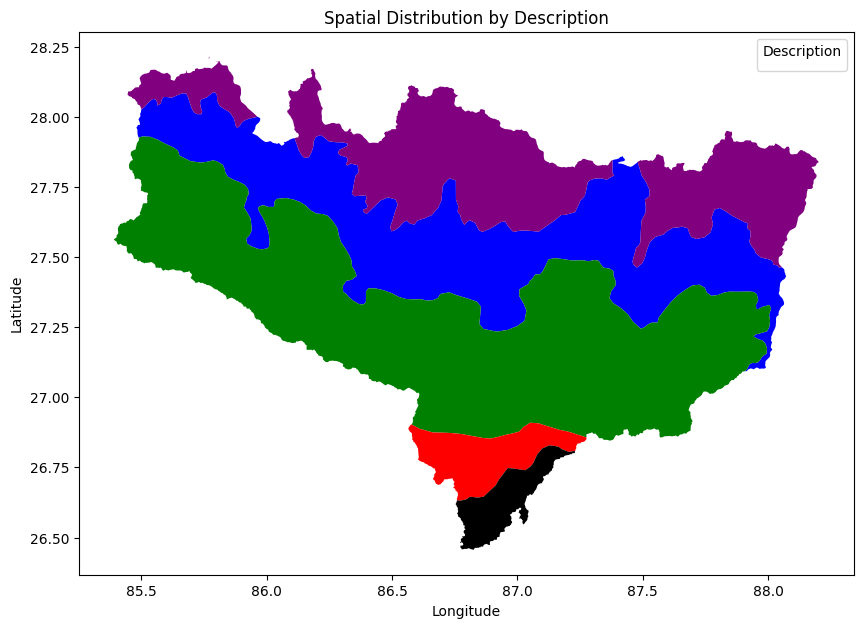

In [25]:
# Define a color map based on the unique values in 'DESCRIPTION'
color_map = {
    'Middle Mountain': 'blue',
    'Hill': 'green',
    'Siwalik': 'red',
    'High Mountain': 'purple',
    'Tarai': 'black',
}

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))


# Plot each unique DESCRIPTION with its corresponding color
for description, color in color_map.items():
    subset = gdf_basin[gdf_basin['DESCRIPTIO'] == description]
    subset.plot(ax=ax, color=color, label=description)

# Add legend and titles
plt.legend(title='Description')
plt.title('Spatial Distribution by Description')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

In [14]:
print(gdf_basin.head())

   OBJECTID      AREA  PERIMETER  PHYSIOGRA_  PHYSIOGRA1       DESCRIPTIO  \
0         1  2.777240   35.98060           3           4  Middle Mountain   
1         2  3.950470   21.69500           4           3             Hill   
2         3  1.736210   19.28480           5           2          Siwalik   
3         4  0.112792    2.20076           7           5    High Mountain   
4         5  0.343545    4.61744           8           5    High Mountain   

   AREA_SQKM  LUT  LUT1  LUT2  LUT3  LUT4  LUT5  Shape_Leng  Shape_Area  \
0  30169.969   82    82    82    82   100    82    9.837355    0.693225   
1  43140.850   82    82    82    70    82    82    8.279443    1.092933   
2  19015.184   70    82    62    82    82    82    1.846236    0.093452   
3   1226.975   82    82    82    82    82    56    1.619202    0.049432   
4   3746.553   82    82    82    82    82    56    4.687494    0.339619   

                                            geometry  
0  POLYGON ((85.96258 28.00089,

In [4]:
df = pd.read_csv(r'G:\fresh_start\paper\code_paper\main_data\raw_data\raw_data_from_tirtha_sir.csv')

In [30]:
unique_stations = df[['Station', 'Lat', 'Long', 'Elev']].drop_duplicates()
print(unique_stations.head())

      Station       Lat      Long  Elev
0        1027  27.78868  85.89999   884
1180     1052  27.67668  85.42397  1315
1731      914  27.66667  84.43333   223
4512      927  27.68902  84.42934   216
7976      918  27.02320  84.87820    67


In [31]:
temp_stations_gdf = gpd.GeoDataFrame(unique_stations, 
                       geometry=gpd.points_from_xy(unique_stations['Long'], unique_stations['Lat']),
                       crs="EPSG:4326")  # WGS84 Latitude/Longitude



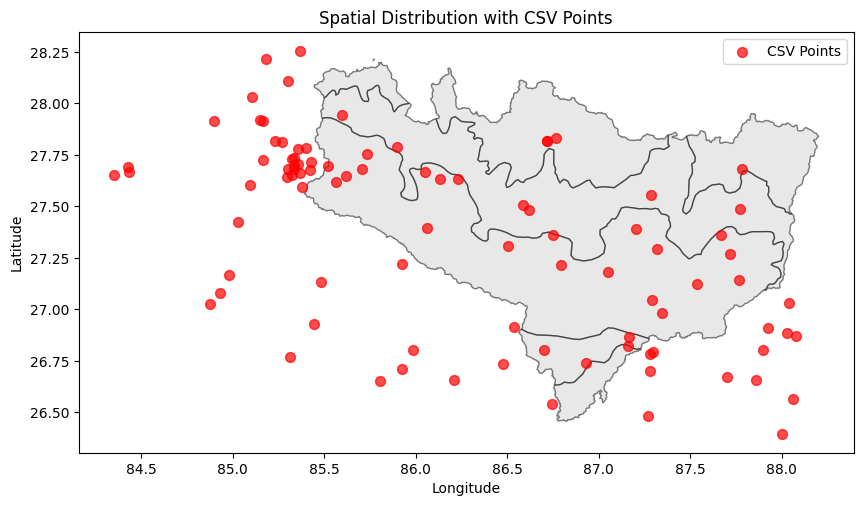

In [33]:
temp_stations_gdf.crs = gdf_basin.crs
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the gdf_basin
gdf_basin.plot(ax=ax, color='lightgrey', edgecolor='k', alpha=0.5)

# Plot the points from the CSV
temp_stations_gdf.plot(ax=ax, color='red', markersize=50, label='CSV Points', alpha=0.7)

# Add legend and titles
plt.legend()
plt.title('Spatial Distribution with CSV Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

In [ ]:
# Perform spatial join
points_within_basin = sjoin(temp_stations_gdf, gdf_basin, predicate='within')



In [42]:
print(points_within_basin.head())
# Define the path for the output CSV file
output_csv_path = 'path_to_your_output_csv_file.csv'

# Export the GeoDataFrame to a CSV file
points_within_basin.to_csv(output_csv_path, index=False)

        Station       Lat      Long  Elev                   geometry  \
0          1027  27.78868  85.89999   884  POINT (85.89999 27.78868)   
18988      1102  27.66667  86.05000  1940     POINT (86.05 27.66667)   
20063      1009  27.75378  85.73208  1552  POINT (85.73208 27.75378)   
37362      1024  27.61612  85.56550  1543   POINT (85.5655 27.61612)   
137469     1103  27.63045  86.23211  1877  POINT (86.23211 27.63045)   

        index_right  OBJECTID     AREA  PERIMETER  PHYSIOGRA_  ...  \
0                 0         1  2.77724    35.9806           3  ...   
18988             1         2  3.95047    21.6950           4  ...   
20063             1         2  3.95047    21.6950           4  ...   
37362             1         2  3.95047    21.6950           4  ...   
137469            1         2  3.95047    21.6950           4  ...   

             DESCRIPTIO  AREA_SQKM  LUT  LUT1  LUT2  LUT3  LUT4  LUT5  \
0       Middle Mountain  30169.969   82    82    82    82   100    82   


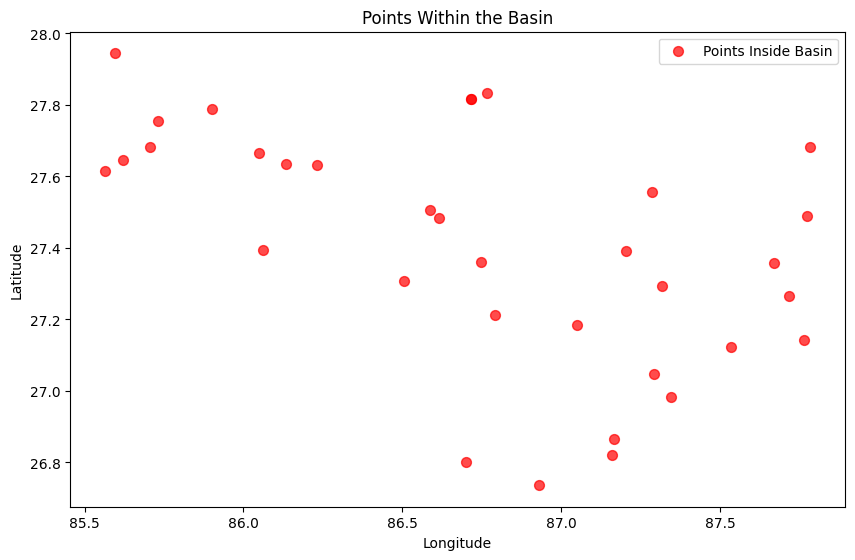

In [40]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the gdf_basin (background layer)
gdf_basin.plot(ax=ax, color='lightgrey', edgecolor='k', alpha=0.5, label='Basin Areas')

# Plot the points within the basin
points_within_basin.plot(ax=ax, color='red', markersize=50, label='Points Inside Basin', alpha=0.7)

# Add legend and titles
plt.legend()
plt.title('Points Within the Basin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

In [27]:
print(temp_stations_gdf.head())

      Station       Lat      Long  Elev                   geometry
0        1027  27.78868  85.89999   884  POINT (85.89999 27.78868)
1180     1052  27.67668  85.42397  1315  POINT (85.42397 27.67668)
1731      914  27.66667  84.43333   223  POINT (84.43333 27.66667)
4512      927  27.68902  84.42934   216  POINT (84.42934 27.68902)
7976      918  27.02320  84.87820    67    POINT (84.8782 27.0232)


In [11]:
# Perform spatial join to find stations within the basin
stations_in_basin = gpd.sjoin(temp_stations_gdf, gdf_basin, how='inner', predicate='within')

In [29]:
print(stations_in_basin.head())

        Station       Lat      Long  Elev                   geometry  \
0          1027  27.78868  85.89999   884  POINT (85.89999 27.78868)   
18988      1102  27.66667  86.05000  1940     POINT (86.05 27.66667)   
20063      1009  27.75378  85.73208  1552  POINT (85.73208 27.75378)   
37362      1024  27.61612  85.56550  1543   POINT (85.5655 27.61612)   
137469     1103  27.63045  86.23211  1877  POINT (86.23211 27.63045)   

        index_right  OBJECTID     AREA  PERIMETER  PHYSIOGRA_  ...  \
0                 0         1  2.77724    35.9806           3  ...   
18988             1         2  3.95047    21.6950           4  ...   
20063             1         2  3.95047    21.6950           4  ...   
37362             1         2  3.95047    21.6950           4  ...   
137469            1         2  3.95047    21.6950           4  ...   

             DESCRIPTIO  AREA_SQKM  LUT  LUT1  LUT2  LUT3  LUT4  LUT5  \
0       Middle Mountain  30169.969   82    82    82    82   100    82   


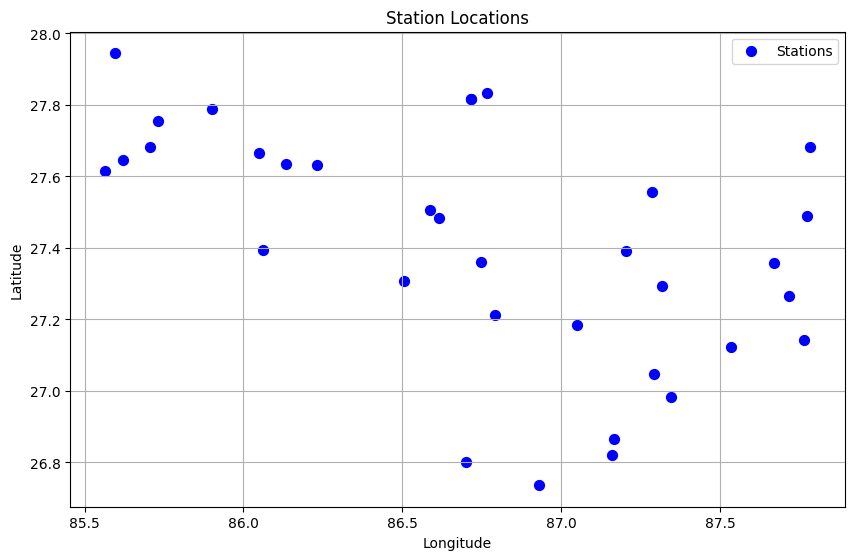

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14920\3462178886.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  stations_in_basin.to_file(r'G:\fresh_start\paper\code_paper\temp_file\stations.shp')
c:\Users\Administrator\anaconda3\envs\article_env\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(


In [13]:

#clipped_gdf = gpd.clip(temp_stations_gdf,gdf_basin)

fig, ax = plt.subplots(figsize=(10, 8))

# Step 2: Plot the GeoDataFrame
stations_in_basin.plot(ax=ax, color='blue', markersize=50, label='Stations')

# Step 3: Customize the plot
plt.title('Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Step 4: Show the plot
plt.legend()
plt.show()




# Step 3: Save the GeoDataFrame as a shapefile
#stations_in_basin.to_file(r'G:\fresh_start\paper\code_paper\temp_file\stations.shp')

In [28]:
print(unique_stations)

        Station       Lat      Long  Elev
0          1027  27.78868  85.89999   884
1180       1052  27.67668  85.42397  1315
1731        914  27.66667  84.43333   223
4512        927  27.68902  84.42934   216
7976        918  27.02320  84.87820    67
...         ...       ...       ...   ...
618004     1404  27.48921  87.77305  1388
623044     1320  26.69882  87.27874   120
633578     1218  27.83333  86.76667  3857
636746     1314  27.12304  87.53619  1525
644593     1213  26.91295  86.53968   469

[91 rows x 4 columns]


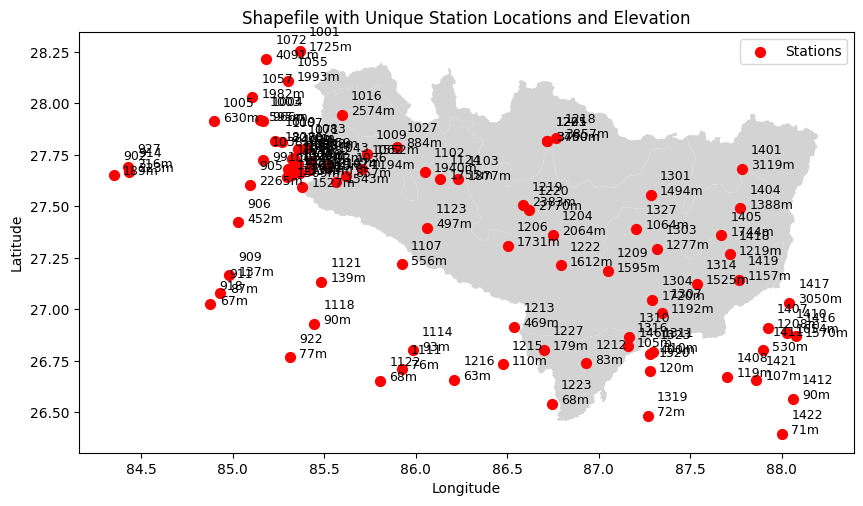

In [24]:
# Step 3: Plot the shapefile
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='lightgrey')  # Plot shapefile in light grey

# Step 4: Plot the unique station locations on the same plot
plt.scatter(unique_stations['Long'], unique_stations['Lat'], c='red', s=50, label='Stations')  # Plot stations

# Step 5: Annotate the stations with elevation
for i, row in unique_stations.iterrows():
    plt.text(row['Long'] + 0.05, row['Lat'], f'{row["Station"]}\n{row["Elev"]}m', fontsize=9)

# Step 6: Customize the plot
plt.title('Shapefile with Unique Station Locations and Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Step 7: Show the plot
plt.show()